In [2]:
from eppy import modeleditor
from eppy.modeleditor import IDF
from matplotlib import pyplot as plt
import os
import pandas as pd
plt.rcParams['figure.figsize'] = [15, 10]

In [3]:
iddfile='/usr/local/EnergyPlus-9-0-1/Energy+.idd' #telling the eplus engine we're using. don't modify
fname = '/home/ictbd/shared/Labs/Models/Exam/idfs/idf_single/idf_single_nosha_noven.idf'
weather='/home/ictbd/shared/Labs/Models/Exam/useful/Torre_Pellice-hour.epw'

In [4]:
IDF.setiddname(iddfile)
idf = IDF(fname,weather)

In [5]:
idf.printidf()


Version,
    9.0;                      !- Version Identifier

SimulationControl,
    Yes,                      !- Do Zone Sizing Calculation
    Yes,                      !- Do System Sizing Calculation
    No,                       !- Do Plant Sizing Calculation
    No,                       !- Run Simulation for Sizing Periods
    Yes;                      !- Run Simulation for Weather File Run Periods

Building,
    Building,                 !- Name
    0,                        !- North Axis
    Suburbs,                  !- Terrain
    0.04,                     !- Loads Convergence Tolerance Value
    0.4,                      !- Temperature Convergence Tolerance Value
    FullExterior,             !- Solar Distribution
    25,                       !- Maximum Number of Warmup Days
    6;                        !- Minimum Number of Warmup Days

ShadowCalculation,
    AverageOverDaysInFrequency,    !- Calculation Method
    20,                       !- Calculation Frequency
    150

In [6]:
for key in idf.idfobjects.keys(): #printing all the idf macro categories
    print (key)

VERSION
SIMULATIONCONTROL
BUILDING
SHADOWCALCULATION
SURFACECONVECTIONALGORITHM:INSIDE
SURFACECONVECTIONALGORITHM:OUTSIDE
HEATBALANCEALGORITHM
HEATBALANCESETTINGS:CONDUCTIONFINITEDIFFERENCE
ZONEAIRHEATBALANCEALGORITHM
ZONEAIRCONTAMINANTBALANCE
ZONEAIRMASSFLOWCONSERVATION
ZONECAPACITANCEMULTIPLIER:RESEARCHSPECIAL
TIMESTEP
CONVERGENCELIMITS
HVACSYSTEMROOTFINDINGALGORITHM
COMPLIANCE:BUILDING
SITE:LOCATION
SITE:VARIABLELOCATION
SIZINGPERIOD:DESIGNDAY
SIZINGPERIOD:WEATHERFILEDAYS
SIZINGPERIOD:WEATHERFILECONDITIONTYPE
RUNPERIOD
RUNPERIODCONTROL:SPECIALDAYS
RUNPERIODCONTROL:DAYLIGHTSAVINGTIME
WEATHERPROPERTY:SKYTEMPERATURE
SITE:WEATHERSTATION
SITE:HEIGHTVARIATION
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE
SITE:GROUNDTEMPERATURE:FCFACTORMETHOD
SITE:GROUNDTEMPERATURE:SHALLOW
SITE:GROUNDTEMPERATURE:DEEP
SITE:GROUNDTEMPERATURE:UNDISTURBED:FINITEDIFFERENCE
SITE:GROUNDTEMPERATURE:UNDISTURBED:KUSUDAACHENBACH
SITE:GROUNDTEMPERATURE:UNDISTURBED:XING
SITE:GROUNDDOMAIN:SLAB
SITE:GROUNDDOMAIN:BASEMENT
SITE:G

Select all the MATERIAL objects

In [7]:
materials = idf.idfobjects["MATERIAL"] #select all the materials composing the building
print (materials)

[
Material,
    Plasterboard_.013,        !- Name
    Rough,                    !- Roughness
    0.013,                    !- Thickness
    0.25,                     !- Conductivity
    2800,                     !- Density
    896,                      !- Specific Heat
    0.9,                      !- Thermal Absorptance
    0.5,                      !- Solar Absorptance
    0.5;                      !- Visible Absorptance
, 
Material,
    Cast Concrete (Lightweight)_.1,    !- Name
    Rough,                    !- Roughness
    0.1,                      !- Thickness
    0.38,                     !- Conductivity
    1200,                     !- Density
    1000,                     !- Specific Heat
    0.9,                      !- Thermal Absorptance
    0.6,                      !- Solar Absorptance
    0.6;                      !- Visible Absorptance
, 
Material,
    MW Glass Wool (rolls)_.1319,    !- Name
    Rough,                    !- Roughness
    0.1319,                   !- Thi

In [8]:
cons = idf.idfobjects["CONSTRUCTION"]
print (cons)

[
Construction,
    LinearBridgingConstruction,    !- Name
    LinearBridgingLayer;      !- Outside Layer
, 
Construction,
    IRTSurface,               !- Name
    IRTMaterial;              !- Outside Layer
, 
Construction,
    Project semi-exposed ceiling_Reversed,    !- Name
    Plasterboard_.013,        !- Outside Layer
    1_RVAL_2,                 !- Layer 2
    Cast Concrete (Lightweight)_.1,    !- Layer 3
    MW Glass Wool (rolls)_.1319,    !- Layer 4
    Plywood (Heavyweight)_.01;    !- Layer 5
, 
Construction,
    Project semi-exposed ceiling_Reversed_Rev,    !- Name
    Plywood (Heavyweight)_.01,    !- Outside Layer
    MW Glass Wool (rolls)_.1319,    !- Layer 2
    Cast Concrete (Lightweight)_.1,    !- Layer 3
    2_RVAL_4,                 !- Layer 4
    Plasterboard_.013;        !- Layer 5
, 
Construction,
    Project external floor,    !- Name
    External Rendering_.025,    !- Outside Layer
    MW Stone Wool (rolls)_.1482,    !- Layer 2
    Timber Flooring_.005;     !- L

Select all the surfaces

In [9]:
"""
constructions aren't a list as we are used to see, but we can access it as if it is a list (eg lista[x]).
To check le length of the "list", we simply use len()
"""
surfaces = idf.idfobjects['BUILDINGSURFACE:DETAILED']
print (surfaces)
print(len(surfaces))

[
BuildingSurface:Detailed,
    Roof:Zone1_Floor_0_0_0,    !- Name
    Floor,                    !- Surface Type
    Project semi-exposed ceiling_Reversed,    !- Construction Name
    Roof:Zone1,               !- Zone Name
    Surface,                  !- Outside Boundary Condition
    MainXfirst:Zone3_Ceiling_1_0_10000,    !- Outside Boundary Condition Object
    NoSun,                    !- Sun Exposure
    NoWind,                   !- Wind Exposure
    0,                        !- View Factor to Ground
    4,                        !- Number of Vertices
    -2.05415136,              !- Vertex 1 Xcoordinate
    18.03994863,              !- Vertex 1 Ycoordinate
    12.6,                     !- Vertex 1 Zcoordinate
    -8.53915136,              !- Vertex 2 Xcoordinate
    18.03994863,              !- Vertex 2 Ycoordinate
    12.6,                     !- Vertex 2 Zcoordinate
    -8.53915136,              !- Vertex 3 Xcoordinate
    25.72994863,              !- Vertex 3 Ycoordinate
    1

Surface objects provides parameters such as:

In [10]:
asurface = surfaces[0]
print(asurface)
#strange thing is that we can find a lot of details, but they are not written in the construction.
#they are probably sparse in the .idf, so if needed we have to properly search them as explained in idf_tutorial
#to access the marameters of the surface, just type <surface object>.<field> 
#If a field is composed by more words, cover every space with an underscore
print("construction name:", asurface.Construction_Name)
print ("surface azimuth =",  asurface.azimuth, "degrees")
print ("surface tilt =", asurface.tilt, "degrees")
print ("surface area =", asurface.area, "m2")


BuildingSurface:Detailed,
    Roof:Zone1_Floor_0_0_0,    !- Name
    Floor,                    !- Surface Type
    Project semi-exposed ceiling_Reversed,    !- Construction Name
    Roof:Zone1,               !- Zone Name
    Surface,                  !- Outside Boundary Condition
    MainXfirst:Zone3_Ceiling_1_0_10000,    !- Outside Boundary Condition Object
    NoSun,                    !- Sun Exposure
    NoWind,                   !- Wind Exposure
    0,                        !- View Factor to Ground
    4,                        !- Number of Vertices
    -2.05415136,              !- Vertex 1 Xcoordinate
    18.03994863,              !- Vertex 1 Ycoordinate
    12.6,                     !- Vertex 1 Zcoordinate
    -8.53915136,              !- Vertex 2 Xcoordinate
    18.03994863,              !- Vertex 2 Ycoordinate
    12.6,                     !- Vertex 2 Zcoordinate
    -8.53915136,              !- Vertex 3 Xcoordinate
    25.72994863,              !- Vertex 3 Ycoordinate
    12

Get the names of the surfaces

In [11]:
s_names = [surface.Name for surface in surfaces]
print (s_names) # print five of them

['Roof:Zone1_Floor_0_0_0', 'MainXfirst:Zone3_Ceiling_1_0_10000', 'Roof:Zone1_Floor_0_1_0', 'MainXfirst:Zone6_Ceiling_1_0_10001', 'Roof:Zone1_Floor_0_2_0', 'MainXfirst:Zone13_Ceiling_1_0_10002', 'Roof:Zone1_Floor_0_3_0', 'MainXfirst:Zone5_Ceiling_1_0_10003', 'Roof:Zone1_Floor_0_4_0', 'MainXfirst:Zone2_Ceiling_1_0_10004', 'Roof:Zone1_Floor_0_5_0', 'MainXfirst:Zone9_Ceiling_1_0_10005', 'Roof:Zone1_Floor_0_5_1', 'MainXfirst:Zone9_Ceiling_1_0_10006', 'Roof:Zone1_Floor_0_5_2', 'MainXfirst:Zone9_Ceiling_1_0_10007', 'Roof:Zone1_Floor_0_6_0', 'MainXfirst:Zone12_Ceiling_1_0_10008', 'Roof:Zone1_Floor_0_7_0', 'MainXfirst:Zone10_Ceiling_1_0_10009', 'Roof:Zone1_Floor_0_8_0', 'MainXfirst:Zone7_Ceiling_1_0_10010', 'Roof:Zone1_Floor_0_9_0', 'MainXfirst:Zone4_Ceiling_1_0_10011', 'Roof:Zone1_Floor_0_10_0', 'MainXfirst:Zone11_Ceiling_1_0_10012', 'Roof:Zone1_Floor_0_11_0', 'MainXfirst:Zone8_Ceiling_1_0_10013', 'Roof:Zone1_ExtFloor_0_12_0', 'Roof:Zone1_ExtFloor_0_12_1', 'Roof:Zone1_ExtFloor_0_12_2', 'Roof:Z

Let us try to isolate the vertical out-door walls



In [12]:
vertical_walls = []
for sf in surfaces:
    if (sf.tilt == 90.0 and sf.Outside_Boundary_Condition=='Outdoors'):
        vertical_walls.append(sf)
print ([sf.Name for sf in vertical_walls])
print ([sf.Construction_Name for sf in vertical_walls])

['Roof:Zone1_Wall_1_0_0', 'MainXfirst:Zone3_Wall_6_0_0', 'MainXfirst:Zone6_Wall_2_0_0', 'MainXfirst:Zone6_Wall_3_0_0', 'MainXfirst:Zone6_Wall_4_0_0', 'MainXfirst:Zone6_Wall_7_0_0', 'MainXfirst:Zone13_Wall_3_0_0', 'MainXfirst:Zone2_Wall_5_0_0', 'MainXfirst:Zone9_Wall_5_0_0', 'MainXfirst:Zone9_Wall_10_0_0', 'MainXfirst:Zone12_Wall_4_0_0', 'MainXfirst:Zone12_Wall_5_0_0', 'MainXfirst:Zone10_Wall_6_0_0', 'MainXfirst:Zone4_Wall_4_0_0', 'MainXfirst:Zone4_Wall_5_0_0', 'MainXfirst:Zone4_Wall_6_0_0', 'MainXfirst:Zone11_Wall_3_0_0', 'MainXfirst:Zone8_Wall_6_0_0', 'MainXground:Zone12_Wall_3_0_0', 'MainXground:Zone14_Wall_3_0_0', 'MainXground:Zone14_Wall_7_0_0', 'MainXground:Zone14_Wall_10_0_0', 'MainXground:Zone14_Wall_14_0_0', 'MainXground:Zone9_Wall_3_0_0', 'MainXground:Zone13_Wall_2_0_0', 'MainXground:Zone13_Wall_3_0_0', 'MainXground:Zone13_Wall_4_0_0', 'MainXground:Zone13_Wall_7_0_0', 'MainXground:Zone7_Wall_5_0_0', 'MainXground:Zone6_Wall_7_0_0', 'MainXground:Zone8_Wall_6_0_0', 'MainXground:Z

In [13]:
con_change=[]
surface_names = []
for sf in vertical_walls: 
    surface_names.append(sf.Construction_Name)
    
for con in cons:
    if con.Name in surface_names:
        con_change.append(con) 

print (con_change)
print(con_change[0].fieldnames)
x = con_change[0].fieldnames
#print(con_change[0].fieldname(x[1]))


[
Construction,
    external wall 70cm,       !- Name
    Gypsum Plastering_.025,    !- Outside Layer
    Brickwork Outer_.65,      !- Layer 2
    Gypsum Plastering_.025;    !- Layer 3
, 
Construction,
    external wall 80cm,       !- Name
    Gypsum Plastering_.025,    !- Outside Layer
    Brickwork Outer_.75,      !- Layer 2
    Gypsum Plastering_.025;    !- Layer 3
]
['key', 'Name', 'Outside_Layer', 'Layer_2', 'Layer_3', 'Layer_4', 'Layer_5', 'Layer_6', 'Layer_7', 'Layer_8', 'Layer_9', 'Layer_10']


In [14]:
#once we have the construction, we want all it's materials
mat_select = []
#start from two, because the first is the construction name
for mat in con_change:
    mat_select.append(mat.fieldvalues[2:])
#mat_select=[mat.fieldvalues[1:] for mat in con_change]
print(mat_select)

mat_change = []
#do a check on the materials to be sure we have all the material of the construction
for mat in materials:
    for change in mat_select:
        if mat.Name in change:
            mat_change.append(mat.Name)
        
print(mat_change)

[['Gypsum Plastering_.025', 'Brickwork Outer_.65', 'Gypsum Plastering_.025'], ['Gypsum Plastering_.025', 'Brickwork Outer_.75', 'Gypsum Plastering_.025']]
['Gypsum Plastering_.025', 'Gypsum Plastering_.025', 'Brickwork Outer_.65', 'Brickwork Outer_.75']


In [15]:
idf.run(readvars=True)


/usr/local/EnergyPlus-9-0-1/energyplus --weather /home/ictbd/shared/Labs/Models/Exam/useful/Torre_Pellice-hour.epw --output-directory /home/ictbd/shared/Labs/Models/Exam/Codes --idd /usr/local/EnergyPlus-9-0-1/Energy+.idd --readvars /home/ictbd/shared/Labs/Models/Exam/Codes/in.idf

EnergyPlus Starting
EnergyPlus, Version 9.0.1-bb7ca4f0da, YMD=2021.12.03 09:26
Initializing Response Factors
Calculating CTFs for "PROJECT SEMI-EXPOSED CEILING_REVERSED", Construction # 3
Calculating CTFs for "PROJECT SEMI-EXPOSED CEILING_REVERSED_REV", Construction # 4
Calculating CTFs for "PROJECT EXTERNAL FLOOR", Construction # 5
Calculating CTFs for "EXTERNAL WALL 70CM", Construction # 7
Calculating CTFs for "PROJECT UNOCCUPIED PITCHED ROOF", Construction # 9
Calculating CTFs for "INTERNAL FLOOR 33CM", Construction # 11
Calculating CTFs for "PARTITION 80CM", Construction # 13
Calculating CTFs for "PARTITION 80CM", Construction # 13
Calculating CTFs for "PARTITION 55CM", Construction # 15
Calculating CTF

EnergyPlus Completed Successfully.


In [20]:
df1=pd.read_csv('eplusout.csv')

In [22]:
#MAINGROUND: piano terra, MAINXFIRST: primo piano
for i in df1.columns:
    print(i)

Date/Time
Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)
Environment:Site Outdoor Air Drybulb Temperature [C](Daily)
Environment:Site Outdoor Air Dewpoint Temperature [C](Hourly)
Environment:Site Outdoor Air Dewpoint Temperature [C](Daily)
Environment:Site Outdoor Air Barometric Pressure [Pa](Hourly)
Environment:Site Outdoor Air Barometric Pressure [Pa](Daily)
Environment:Site Wind Speed [m/s](Hourly)
Environment:Site Wind Speed [m/s](Daily)
Environment:Site Wind Direction [deg](Hourly)
Environment:Site Wind Direction [deg](Daily)
Environment:Site Diffuse Solar Radiation Rate per Area [W/m2](Hourly)
Environment:Site Diffuse Solar Radiation Rate per Area [W/m2](Daily)
Environment:Site Direct Solar Radiation Rate per Area [W/m2](Hourly)
Environment:Site Direct Solar Radiation Rate per Area [W/m2](Daily)
Environment:Site Solar Azimuth Angle [deg](Hourly)
Environment:Site Solar Azimuth Angle [deg](Daily)
Environment:Site Solar Altitude Angle [deg](Hourly)
Environment:Site Sol

In [24]:
for i in df1.columns:
    if 'Temperature' in i and 'Zone' in i:
        print(i)

ROOF:ZONE1:Zone Mean Radiant Temperature [C](Hourly:ON)
ROOF:ZONE1:Zone Mean Radiant Temperature [C](Daily:ON)
MAINXFIRST:ZONE3:Zone Mean Radiant Temperature [C](Hourly:ON)
MAINXFIRST:ZONE3:Zone Mean Radiant Temperature [C](Daily:ON)
MAINXFIRST:ZONE6:Zone Mean Radiant Temperature [C](Hourly:ON)
MAINXFIRST:ZONE6:Zone Mean Radiant Temperature [C](Daily:ON)
MAINXFIRST:ZONE13:Zone Mean Radiant Temperature [C](Hourly:ON)
MAINXFIRST:ZONE13:Zone Mean Radiant Temperature [C](Daily:ON)
MAINXFIRST:ZONE5:Zone Mean Radiant Temperature [C](Hourly:ON)
MAINXFIRST:ZONE5:Zone Mean Radiant Temperature [C](Daily:ON)
MAINXFIRST:ZONE2:Zone Mean Radiant Temperature [C](Hourly:ON)
MAINXFIRST:ZONE2:Zone Mean Radiant Temperature [C](Daily:ON)
MAINXFIRST:ZONE9:Zone Mean Radiant Temperature [C](Hourly:ON)
MAINXFIRST:ZONE9:Zone Mean Radiant Temperature [C](Daily:ON)
MAINXFIRST:ZONE12:Zone Mean Radiant Temperature [C](Hourly:ON)
MAINXFIRST:ZONE12:Zone Mean Radiant Temperature [C](Daily:ON)
MAINXFIRST:ZONE10:Zone M

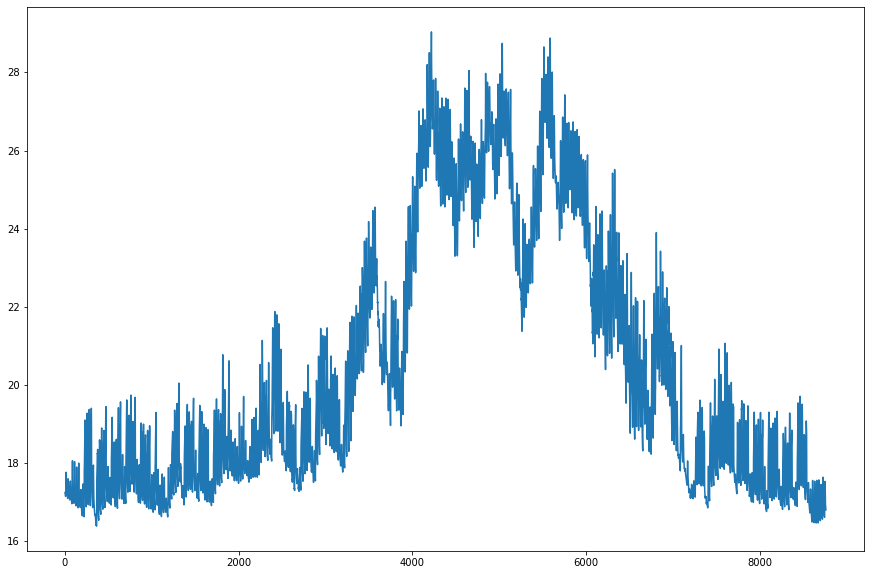

In [28]:
df1['MAINXGROUND:ZONE1:Zone Operative Temperature [C](Hourly:ON)'].plot()

In [42]:
df1['MAINXGROUND:ZONE1:Zone Operative Temperature [C](Hourly:ON)'].median()

19.1587982386716

In [31]:
"""for mat in materials:
    if mat.Name in mat_change:
        mat.Density=1000.0
        mat.Specific_Heat=900.0 """

for mat in materials:
    if mat.Name == 'Gypsum Plastering_.025':
        while thick < 0.35:
            mat.Thickness += 0.02 
            idf.run(readvars=True)
            df=pd.read_csv('eplusout.csv')
            df['MAINXGROUND:ZONE1:Zone Operative Temperature [C](Hourly:ON)'].plot()
            df['MAINXGROUND:ZONE1:Zone Operative Temperature [C](Hourly:ON)'].median()
        

In [32]:
idf.run(readvars=True)


/usr/local/EnergyPlus-9-0-1/energyplus --weather /home/ictbd/shared/Labs/Models/Exam/useful/Torre_Pellice-hour.epw --output-directory /home/ictbd/shared/Labs/Models/Exam/Codes --idd /usr/local/EnergyPlus-9-0-1/Energy+.idd --readvars /home/ictbd/shared/Labs/Models/Exam/Codes/in.idf

EnergyPlus Starting
EnergyPlus, Version 9.0.1-bb7ca4f0da, YMD=2021.12.02 11:20
Initializing Response Factors
Calculating CTFs for "PROJECT SEMI-EXPOSED CEILING_REVERSED", Construction # 3
Calculating CTFs for "PROJECT SEMI-EXPOSED CEILING_REVERSED_REV", Construction # 4
Calculating CTFs for "PROJECT EXTERNAL FLOOR", Construction # 5
Calculating CTFs for "EXTERNAL WALL 70CM", Construction # 7
Calculating CTFs for "PROJECT UNOCCUPIED PITCHED ROOF", Construction # 9
Calculating CTFs for "INTERNAL FLOOR 33CM", Construction # 11
Calculating CTFs for "PARTITION 80CM", Construction # 13
Calculating CTFs for "PARTITION 80CM", Construction # 13
Calculating CTFs for "PARTITION 55CM", Construction # 15
Calculating CTF

In [33]:
df=pd.read_csv('eplusout.csv')

In [34]:
for col in df.columns:
    print (col)

Date/Time
Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)
Environment:Site Outdoor Air Drybulb Temperature [C](Daily)
Environment:Site Outdoor Air Dewpoint Temperature [C](Hourly)
Environment:Site Outdoor Air Dewpoint Temperature [C](Daily)
Environment:Site Outdoor Air Barometric Pressure [Pa](Hourly)
Environment:Site Outdoor Air Barometric Pressure [Pa](Daily)
Environment:Site Wind Speed [m/s](Hourly)
Environment:Site Wind Speed [m/s](Daily)
Environment:Site Wind Direction [deg](Hourly)
Environment:Site Wind Direction [deg](Daily)
Environment:Site Diffuse Solar Radiation Rate per Area [W/m2](Hourly)
Environment:Site Diffuse Solar Radiation Rate per Area [W/m2](Daily)
Environment:Site Direct Solar Radiation Rate per Area [W/m2](Hourly)
Environment:Site Direct Solar Radiation Rate per Area [W/m2](Daily)
Environment:Site Solar Azimuth Angle [deg](Hourly)
Environment:Site Solar Azimuth Angle [deg](Daily)
Environment:Site Solar Altitude Angle [deg](Hourly)
Environment:Site Sol

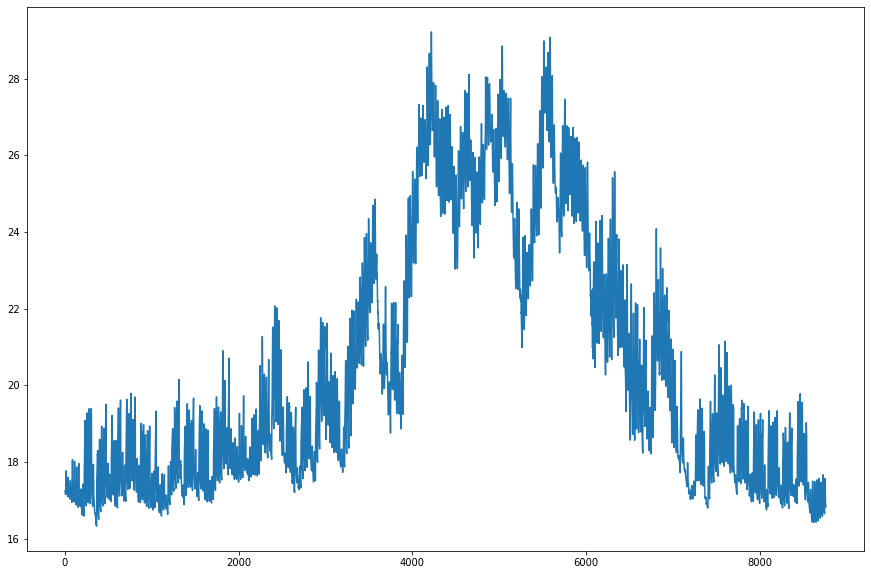

In [35]:
df['MAINXGROUND:ZONE1:Zone Operative Temperature [C](Hourly:ON)'].plot()

In [43]:
df['MAINXGROUND:ZONE1:Zone Operative Temperature [C](Hourly:ON)'].median()

19.181161681836734